# Project: Visualizing Race and Gender Representation In American Movies

In this project I will use data visualization techniques to analyze how the top 50 movies of 2016 performed according to the <a href = "https://en.wikipedia.org/wiki/Bechdel_test" target="_blank"> Bechdel Test </a>and other representation-based tests. 

**The Bechdel-Wallace Test** — often abbreviated to the "Bechdel Test" — evaluates movies based on two simple questions:

  1.  Does the movie have at least two named female characters?
  2.  And do those characters have at least one conversation that is not about a man?

I use a dataset called  "The Next Bechdel Test" from <a href="https://www.fivethirtyeight.com" target="_blank">fivethirtyeight.com</a>.

<a href = "https://projects.fivethirtyeight.com/next-bechdel/" target="_blank">The Next Bechdel Test </a>


  
In addition to results of the Bechdel test, this dataset includes the results of similar representation tests developed by members of the movie industry and evaluated by <a href = "http://fivethirtyeight.com" target="_blank">fivethirtyeight.com. </a>

**The Waithe Test** (Lena Waithe)

A movie passes if:
- There's a black woman in the work
- Who's in a position of power
- And she's in a healthy relationship

**The Ko Test** (Naomi Ko)

A movie passes if:
- There's a non-white, female-identifying person in the film
- Who speaks in five or more scenes
- And speaks english


## Imports

Import matplotlib.pyplot as plt and pandas as pd.

In [1]:
import matplotlib as plt 
import pandas as pd

In [30]:
df = pd.read_csv("bechdelExpanded.csv")

## Inspecting the data

The first column in the dataset is the name of a movie. Each column that follows represents one of the tests being applied to each movie. Each row represents whether that movie passed, or failed each test. A `1` represents a passing score, and a `0` represents a failing score.

In [5]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1
1,Hidden Figures,1,0,0,0,0,1,1,1,1,1,1,1,1
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1


## Creating a new column summarizing total score
 I create a new column called total_score that will give me the total score each movie received based on the bechdel, waithe and ko tests..

In [31]:
df["total_score"] = df.bechdel + df.waithe + df.ko

In [32]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Hidden Figures,1,0,0,0,0,1,1,1,1,1,1,1,1,3
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0,2
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1,1


## Sorting Data

It will be easier to visualize our data if it is organized by each movie's total score, so I organize the data in ascending order according to the total_score column

In [33]:
df_sorted =  df.sort_values("total_score").reset_index(drop = True)

In [34]:
df_sorted.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
2,Boo! A Madea Halloween,0,0,1,1,1,1,0,1,0,0,1,1,1,0
3,Central Intelligence,1,0,1,1,1,1,0,1,0,1,1,1,1,1
4,Suicide Squad,0,0,1,1,1,1,0,1,1,1,1,1,0,1


## Isolating the Data for Visualization

Here, I create a new dataframe that takes the bechdel, waithe, ko and total_score columns from the df_sorted dataframe in order to create a graphic visualization of the data

In [18]:
new_df = df_sorted[["movie", "bechdel", "waithe", "ko", "total_score"]]

In [35]:
new_df.head(10)

,movie,bechdel,waithe,ko,total_score
0,Bad Moms,0,0,0,0
1,Independence Day: Resurgence,0,0,0,0
2,Boo! A Madea Halloween,0,0,0,0
3,Central Intelligence,1,0,0,1
4,Suicide Squad,0,1,0,1
5,Sausage Party,0,1,0,1
6,Fantastic Beasts and Where to Find Them,0,1,0,1
7,Sing,0,1,0,1
8,The Purge: Election Year,0,1,0,1
9,Ice Age: Collision Course,0,1,0,1


## Create a bar graph with Matplotlib 


creating an ax object 

In [21]:
ax = new_df[["movie", "total_score"]].set_index("movie")

graphing the dataframe

<AxesSubplot:title={'center':'Representation in Movies'}, xlabel='movie'>

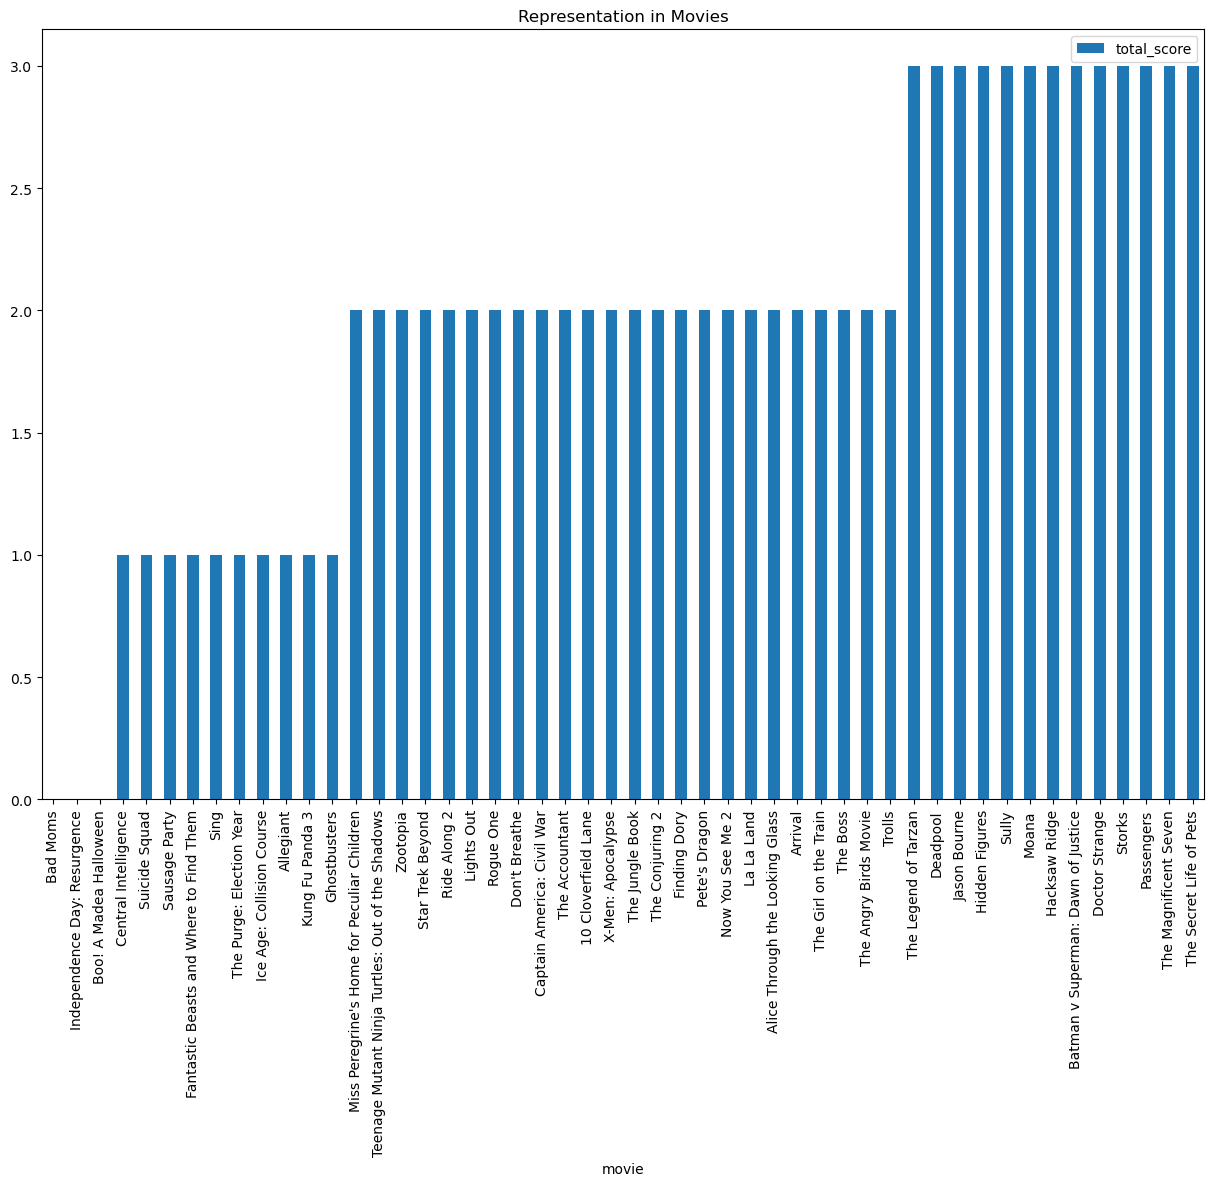

In [36]:
ax.plot(kind = "bar", legend = True, figsize = (15, 10), title = "Representation in Movies")

## Creating a horizontal bar graph representing the same data

<AxesSubplot:ylabel='movie'>

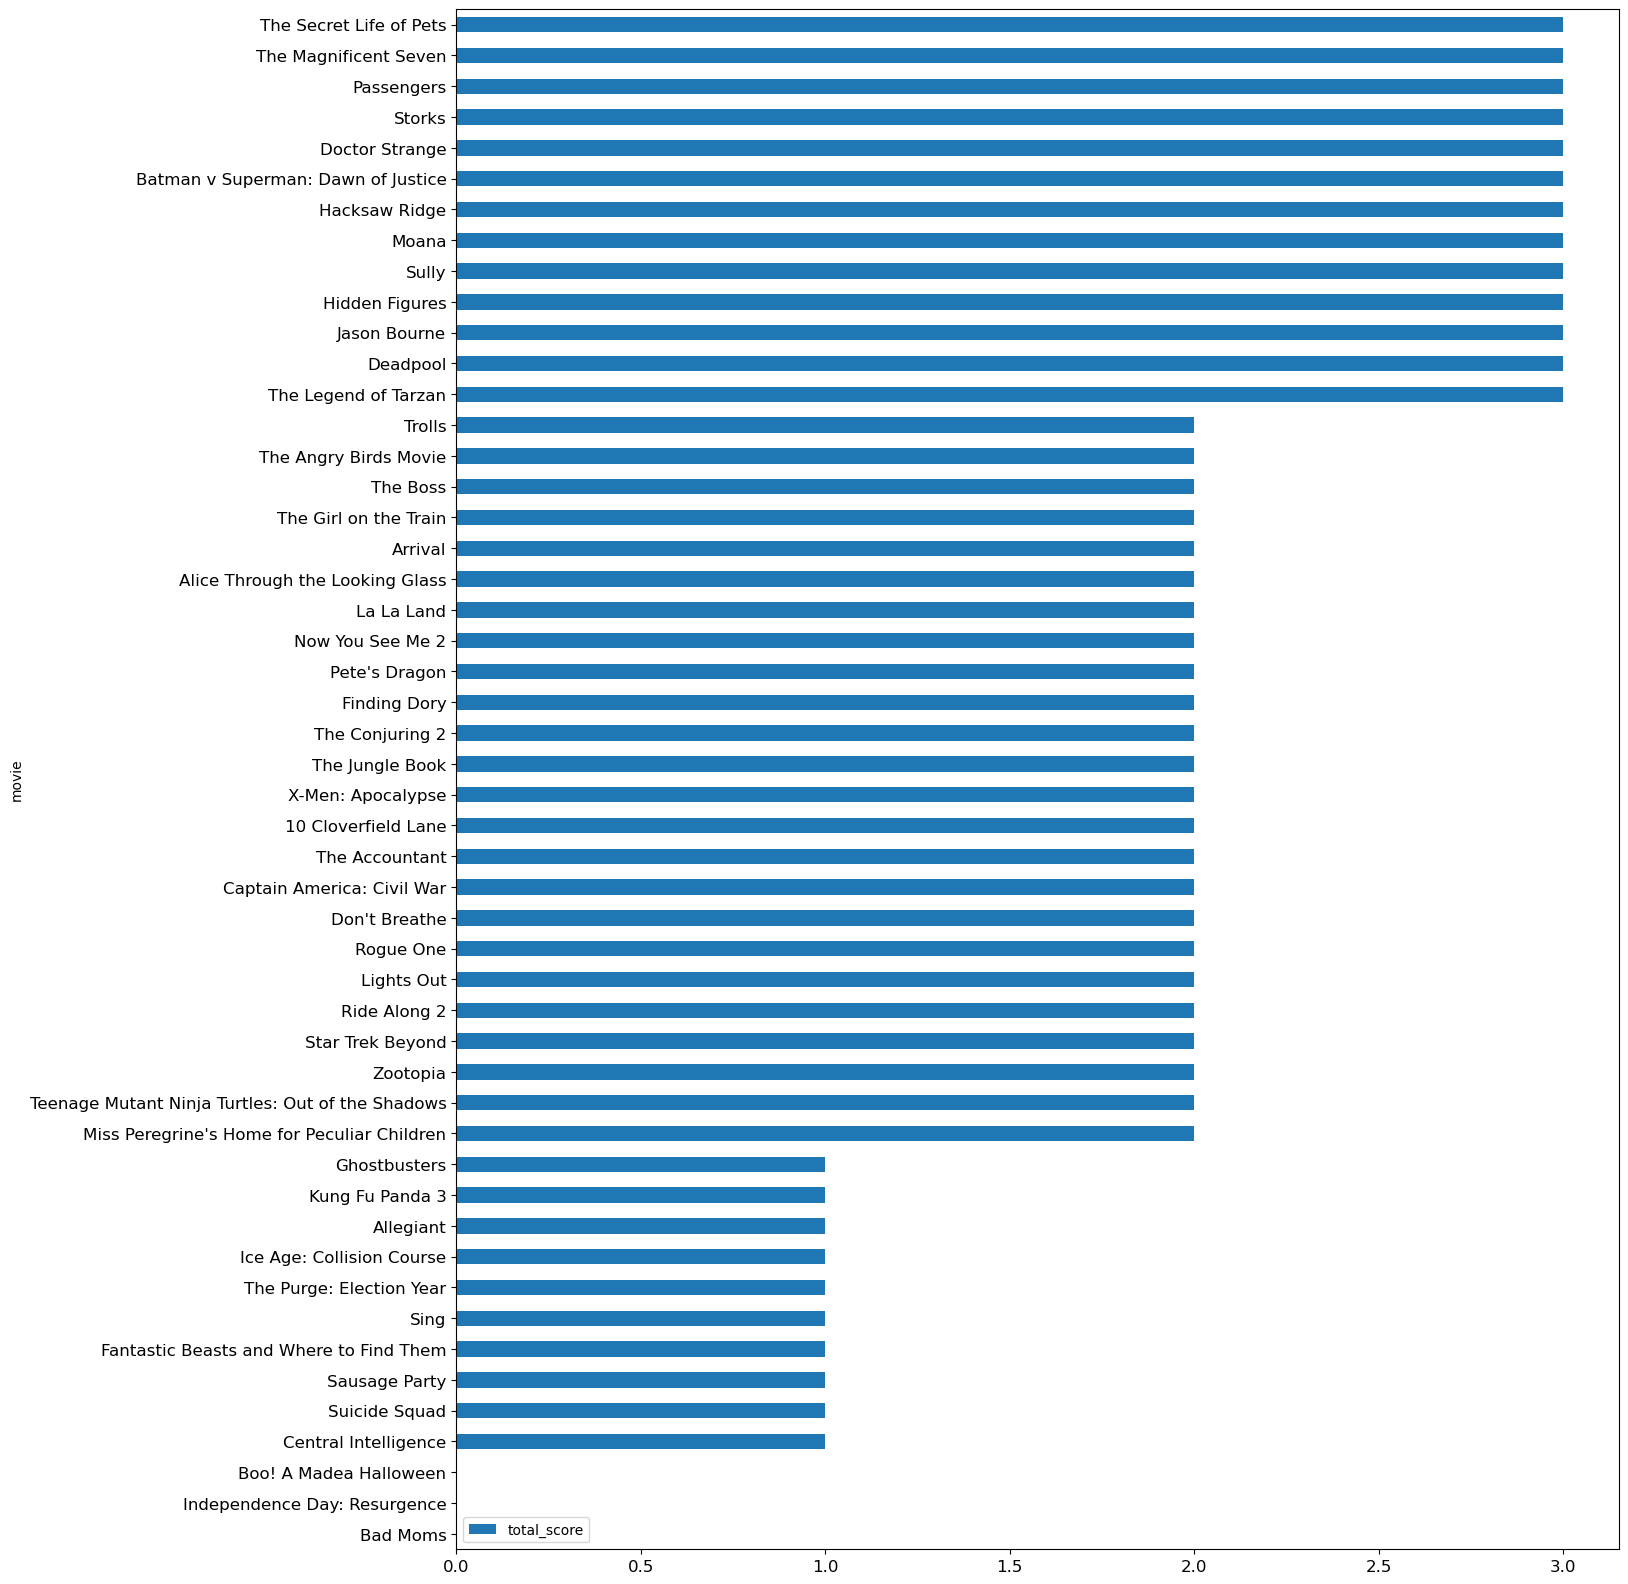

In [38]:
ax.plot(kind = "barh", fontsize = 12, figsize = (15, 20), legend = True)

## And we are done!

---